# <center> Python Programming in Energy Science </center>

## <center> Lecture 3, 15 November 2023 </center>

### <center> Lecturer: Dr. Martin Dörenkämper, Fraunhofer IWES</center>
<center> martin.doerenkaemper@iwes.fraunhofer.de</center>

-------------------------------

### **Contents**

3. Introduction to Matplotlib
--------------------------------

#### Objectives of this lecture
- Learn how to plot scientific results 
- Learn different plot styles (points, lines, bars, polars, 2D)
- Save figures in different formats 
- Do nice looking panel plots that could be useful for e.g. your MA theses

## (3.0) Introduction to Matplotlib

#### 3.1 Background (What is matplotlib?)
Matplotlib is an extensive plotting library for the python language which allows for creating simple but also very fancy, nice looking plots. It is developed since 2002, in recent years by a large community (several hundred contributors) on github: https://github.com/matplotlib/matplotlib 

Matplotlib allows for creating two or three dimensional plots, that can be saved in many formats (e.g. png, pdf, svg).If you read a recently published scientific journal paper it will with a very high probability contain plots generated with matplotlib. 

Matplotlib has a very nice documentation and a lot of tutorials online. I recommend to have a look to the gallery: https://matplotlib.org/gallery.html


But let's get started now: 

In [1]:
# First we need to import some example climate data...

## Data Sources (modified by the lecturer before):
# German Weather Service: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/
# ERA5 Data: https://cds.climate.copernicus.eu/ - ERA5 - Surface Data - 2m temperature and u100,v100
# OSTIA Data: http://ghrsst-pp.metoffice.com/ostia/

# # You can ignore the following syntax for now (will be part of a follow-up lecture)
import pandas as pd
import numpy as np

# Time Series
ol_era5_all=pd.read_csv("./files/ERA5_Oldenburg_1979-2019.csv",index_col=0)
ol_era5_avg=pd.read_csv("./files/ERA5_Oldenburg_1979-2019_yavg.csv",index_col=0)
lowsax_clim=pd.read_csv("./files/DWD_LowerSaxony_ClimateAvg.csv",index_col=0)

# 2D data
nh_ice19=np.loadtxt("./files/ice19.txt")
nh_ice89=np.loadtxt("./files/ice89.txt")
lon=np.loadtxt("./files/lon.txt")
lat=np.loadtxt("./files/lat.txt")


In [2]:
# We end up from this data import with a few lists that we will use in the following
nds_yr=lowsax_clim.index.tolist()
nds_sd=lowsax_clim.summer_days.values.tolist()
nds_id=lowsax_clim.ice_days.values.tolist()
nds_t2=lowsax_clim.t2_mean.values.tolist()
nds_sund=lowsax_clim.sunshine_duration.values.tolist()

In [3]:
# First we need to import the matplotlib library
import matplotlib.pyplot as plt

#### 3.2 Procedural vs. object-oriented plotting

There is a non-object oriented and an object-oriented (you will learn later what this is) way of creating plots. The non-object oriented way looks more easy and intuitive in the first place and was introduced to you in the assingment help sheet earlier: 

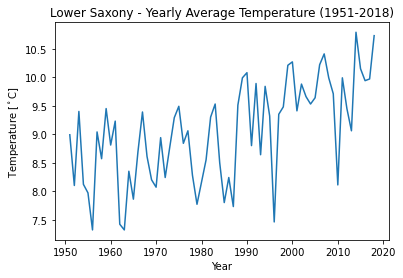

In [4]:
# Non-object oriented plot
plt.figure()
plt.plot(nds_yr,nds_t2)
plt.xlabel("Year")
plt.ylabel("Temperature [$^\circ$C]")
plt.title("Lower Saxony - Yearly Average Temperature (1951-2018)")
plt.show()

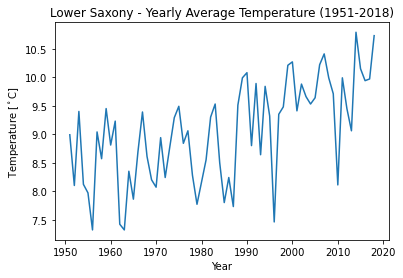

In [5]:
# Object oriented way of plotting
fig, ax = plt.subplots() # Function that returns tuple of figur and axes object
ax.plot(nds_yr,nds_t2)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [$^\circ$C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
plt.show()

**Note:** We have produced two plots that look exactly the same. We stronly recommend you to learn and stick with the second version because it is much more flexible and also a bit more intuitive. As soon as you intend to do more complex plots you will need it anyhow. As you can see the syntax (e.g. axis labelling "set_" vs. non-set) is different.   

#### 3.3 Change figure properties (global and local)
Some global figure properties 

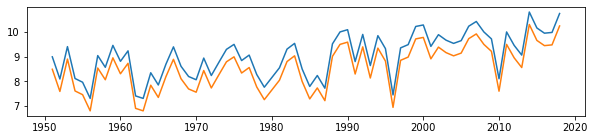

In [6]:
fig,ax = plt.subplots(figsize=(10,2)) # Widht and height of figure
ax.plot(nds_yr,nds_t2)
ax.plot(nds_yr,[i-0.5 for i in nds_t2])
fig.savefig("first_figure.pdf",bbox_inches="tight") # Just change the file ending (e.g. first_figure.png) to save in a 
                                                    # different file format. The bbox_inches="tight" reduces the white 
                                                    # space around the figure
fig.savefig("first_figure.png",dpi=600,bbox_inches="tight") # Specify DPI (dots per inch to affect figure quality)      

#### 3.4 Linestyles and Legends
Linestyles can either be changed by shortcuts: 
    
    *b-* for a blue solid line (k=black,r=red, -.= dash dotted etc.) or by the function arguments 'color', 'linestyle'. 
    
Labels or texts in figures can contain latex notedown, font sizes, also font families can be changed easily

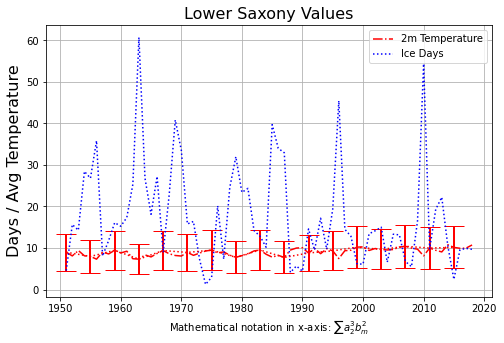

In [7]:
# Multiple lines in one plot with legend and mathematical note down in Texts
err=[i*0.5 for i in nds_t2]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nds_yr,nds_t2,'r-.',label="2m Temperature")
ax.errorbar(nds_yr[::4],nds_t2[::4],yerr=err[::4], color="red", linestyle="dotted", capsize=10, elinewidth=2)
ax.plot(nds_yr,nds_id,color="blue",linestyle="dotted",label="Ice Days")
# Set the legend without argument it tries to place in best position possible 
ax.legend()
ax.set_xlabel("Mathematical notation in x-axis: $\sum a_2^3 b_m^2$" )#\frac{m_0}{\sqrt{1-\frac{v^2}{c^2}}}$") # Latex notation possible
ax.set_ylabel("Days / Avg Temperature",fontsize=16)
ax.set_title("Lower Saxony Values",fontsize=16) # Changed Font
ax.grid() # Add a grid
plt.show()

#### 3.5 Other Plot Types for time series and statistics
So far we have only looked at line plots, but we can do much much more. 


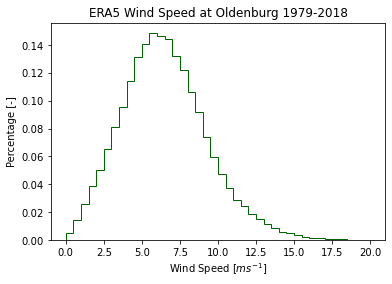

In [8]:
# Histograms
fig,ax=plt.subplots()
# In Wind Energy applications, it is common standard to use bins of 0.5 m/s
ax.hist(ol_era5_all.ws100,bins=40,range=(0,20),color="darkgreen",density=True,histtype='step')
# Cumulative Histogram:
#ax.hist(ol_era5_all.ws100,bins=40,range=(0,20),color="darkgreen",cumulative=True,density=True)
ax.set_ylabel("Percentage [-]")
ax.set_xlabel("Wind Speed $[ms^{-1}]$")
ax.set_title("ERA5 Wind Speed at Oldenburg 1979-2018")
plt.show()

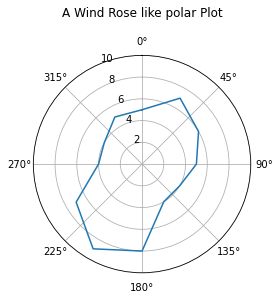

In [9]:
# Polar Plot of Wind Direction and Speed
wd=[0,30,60,90,120,150,180,210,240,270,300,330,360]
ws=[5, 7,6 ,5 ,4  ,4  ,8  ,9  ,7  ,4  ,4 , 5, 5]
wdrad=[np.deg2rad(i) for i in wd]

# Change the Projection to polar
ax = plt.subplot(projection='polar')
ax.plot(wdrad, ws)
ax.set_rmax(10.0)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
#ax.set_rticks([0.5, 1, 1.5, 3.0])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.set_title("A Wind Rose like polar Plot",pad=20) # shift title a bit up 
plt.show()

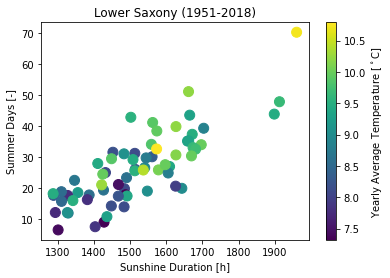

In [10]:
# Color Points by Values
from matplotlib import cm
cm = plt.cm.get_cmap('viridis') # Other Colormaps Options: viridis

fig,ax = plt.subplots()

#im=ax.scatter(nds_sund,nds_sd,c=nds_t2, vmin=np.min(nds_t2), vmax=np.max(nds_t2), s=35, cmap=cm)
#im=ax.scatter(nds_sund,nds_sd,c=nds_t2, vmin=np.min(nds_t2), vmax=np.max(nds_t2), s=35, cmap=cm)

im=ax.scatter(nds_sund,nds_sd,c=nds_t2, s=100, cmap=cm)

ax.set_xlabel("Sunshine Duration [h]")
ax.set_ylabel("Summer Days [-]")
ax.set_title("Lower Saxony (1951-2018)")
fig.colorbar(im, ax=ax, label="Yearly Average Temperature [$^\circ$C] ")
plt.show()

#### 3.6 2D plots

Matplotlib is not limited to one dimensional plots but also well suited for plotting multi-dimensional data. There are several options for plotting two-dimensional data: 

- *imshow* - follows conventions used in image processing (origin in top left order) and assumes that all data elements in your array are to be rendered at the same size (e.g. like an image where all pixels have the same size)
- ~~- *pcolor* - allows to generate 2-D image-style plots~~
- *pcolormesh* - a much faster and more flexible version of pcolor (so forget about ~~*pcolor*~~) that in contrast to imshow associates elements of the data array with rectangular elements whose size may vary over the rectangular grid.
- *contour* - Calculates and plots contour lines
- *contourf* - Calculates and plots filled contour

This is by far not an exhaustive list. For instance complex specialised python libraies for plotting geodata (e.g. maps) exist. This will be covered in the next semester. However, with the above mentioned (and below explained) methods you are well equippedd and can generate e.g. maps as well....

In [11]:
# We have some 2D arrays to look into
nh_ice19.shape
#h_ice89
#lat
#lon

(599, 7200)

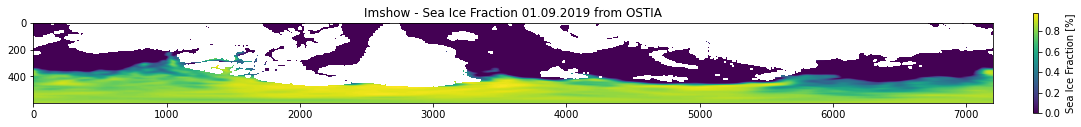

In [12]:
# Imshow
fig, ax = plt.subplots(figsize=(18,18))
im=ax.imshow(nh_ice19,cmap="viridis") 
ax.set_title("Imshow - Sea Ice Fraction 01.09.2019 from OSTIA")
# Add a Color bar to the right of the plot
fig.colorbar(im, ax=ax, label="Sea Ice Fraction [%]", fraction=0.005, pad=0.04)
plt.show()

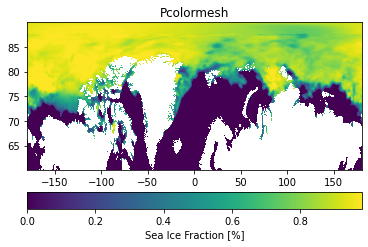

In [13]:
# pcolormesh
# We change the axis here
fig, ax = plt.subplots()
ax.pcolormesh(lon,lat,nh_ice89,cmap='viridis',shading="auto") # options include edgecolors="k", linedwidth=4
ax.set_title('Pcolormesh')
ax.set_aspect('auto') #'auto'
fig.colorbar(im, ax=ax, label="Sea Ice Fraction [%]", fraction=0.22, pad=0.1, orientation="horizontal")
plt.show()


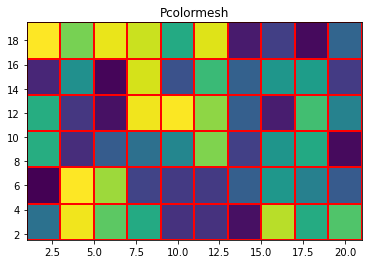

In [14]:
# Let's get some 2-dimensional data: 
np.random.seed(42)
Z = np.random.rand(6, 10)
# pcolormesh
# We change the axis here
x=[2,4,6,8,10,12,14,16,18,20]
y=[3,6,9,12,15,18]
fig, ax = plt.subplots()
ax.pcolormesh(x,y,Z,edgecolors="r", linewidth=2,shading="auto")
ax.set_title('Pcolormesh')
plt.show()

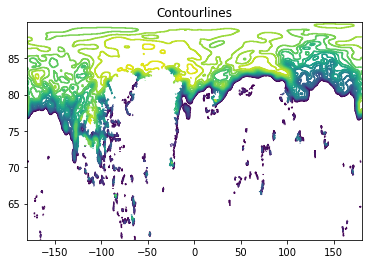

In [15]:
# Contour lines
fig, ax = plt.subplots()
ax.contour(lon,lat,nh_ice19,20)
#ax.contour(lon,lat,nh_ice19,5)
ax.set_title("Contourlines")
plt.show()

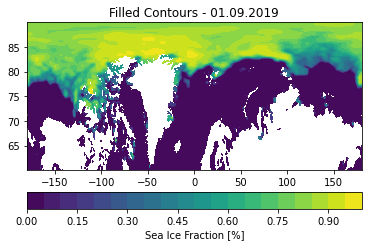

In [16]:
# Filled Contour areas
fig, ax = plt.subplots()
im=ax.contourf(lon,lat,nh_ice19,20)
fig.colorbar(im, ax=ax, label="Sea Ice Fraction [%]", fraction=0.22, pad=0.1, orientation="horizontal")
ax.set_title("Filled Contours - 01.09.2019")
plt.show()

#### 3.7 Multiple Subplots (Panel Plots)
In many cases (e.g. for theses) you want to have several plots combined by panels. Mapltlib offers an easy way of combining several 

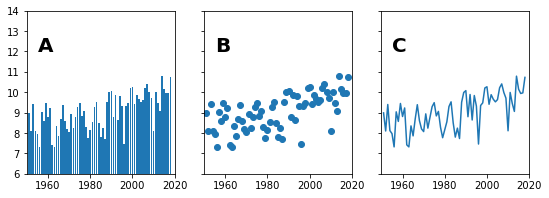

In [17]:
fig1,axs = plt.subplots(1,3,figsize=(9,3),sharey=True) # With sharey=True we switch on axis sharing for y 
axs[0].bar(nds_yr,nds_t2)
axs[0].set_xlim([1950,2020])
axs[1].scatter(nds_yr,nds_t2)
axs[1].set_xlim([1950,2020])
axs[2].plot(nds_yr,nds_t2)
axs[2].set_xlim([1950,2020])
axs[0].set_ylim([6,14]) # Need to modify only once because it's shared
axs[0].text(1955, 12, "A", size=20, weight='bold')
axs[1].text(1955, 12, "B", size=20, weight='bold')
axs[2].text(1955, 12, "C", size=20, weight='bold')
plt.show()

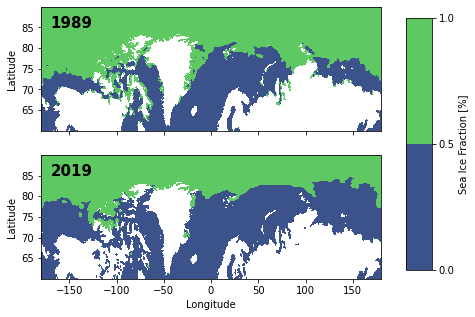

In [18]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(7,5),sharex=True)
im0=ax0.contourf(lon,lat,nh_ice89,1)
im1=ax1.contourf(lon,lat,nh_ice19,1)
ax0.text(-170,85, "1989", size=15, weight='bold')
ax1.text(-170,85, "2019", size=15, weight='bold')
ax1.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax1.set_ylabel("Latitude")

# put colorbar at desire position
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im0, cax=cbar_ax, label="Sea Ice Fraction [%]", fraction=0.1, pad=0.05)
plt.show()

**Colormaps**: One comment about colormaps. Python offers a nice collection of perceptually uniform sequential color maps. These are viridis, plasma, inferno, magma, cividis. I strongly recommend to use these types of color maps only. When looking at images, they do not add aritificial information to your images that is not there. 
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

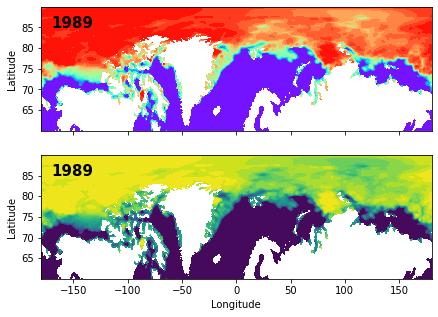

In [19]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(7,5),sharex=True)
im0=ax0.contourf(lon,lat,nh_ice89,20,cmap='rainbow')
im1=ax1.contourf(lon,lat,nh_ice89,20)
ax0.text(-170,85, "1989", size=15, weight='bold')
ax1.text(-170,85, "1989", size=15, weight='bold')
ax1.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
ax1.set_ylabel("Latitude")
plt.show()

(3.X) Additional helpful plotting material 

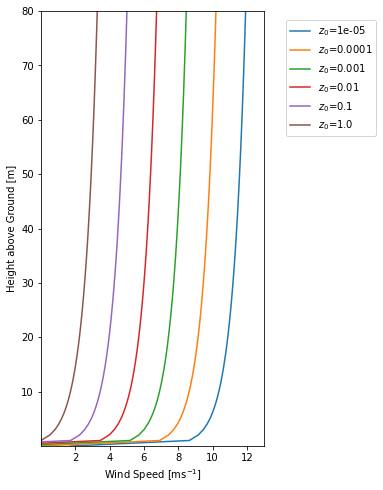

In [20]:
# Logarithmic Acces: Show logarithmic wind profile
z0=0.004
ustar=0.3
kappa=0.4
z=np.linspace(0.0001,80,80)

fig,ax=plt.subplots(figsize=(4,8))
for z0 in [0.00001,0.0001,0.001,0.01,0.1,1.0]:
    U=ustar/kappa*np.log(z/z0)
    ax.plot(U,z,label="$z_0$="+str(z0))
    #ax.semilogy(U,z,label="$z_0$={}".format(z0)+" m") # Logarithmich
ax.set_xlim(0.01,13.0)
ax.set_ylim(0.001,80.0)
ax.set_ylabel("Height above Ground [m]")
ax.set_xlabel("Wind Speed [ms$^{-1}$]")
ax.legend(loc="upper center",bbox_to_anchor=(1.3,0.99))
plt.show()